Dữ liệu gốc (5 dòng đầu):
                          Close
Date                           
2013-04-29 23:59:59  144.539993
2013-04-30 23:59:59  139.000000
2013-05-01 23:59:59  116.989998
2013-05-02 23:59:59  105.209999
2013-05-03 23:59:59   97.750000

Tổng số dòng dữ liệu: 2991

Hình dạng của X (dữ liệu đầu vào): (2930, 60, 1)
Hình dạng của y (dữ liệu mục tiêu): (2930,)

Số lượng mẫu training: 2344
Số lượng mẫu testing: 586


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 60, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 60, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,777 (186.63 KB)

 Trainable params: 47,777 (186.63 KB)

 Non-trainable params: 0 (0.00 B)


--- Bắt đầu huấn luyện mô hình GRU ---
Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - loss: 0.0010 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 1.5109e-04 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 1.1037e-04 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 9.3216e-05 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 9.7298e-05 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 1.0826e-04 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 7.8609e-05 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 7.5003e-05 - val_loss: 0.0020 - learning_rate: 2.0000e-04
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━

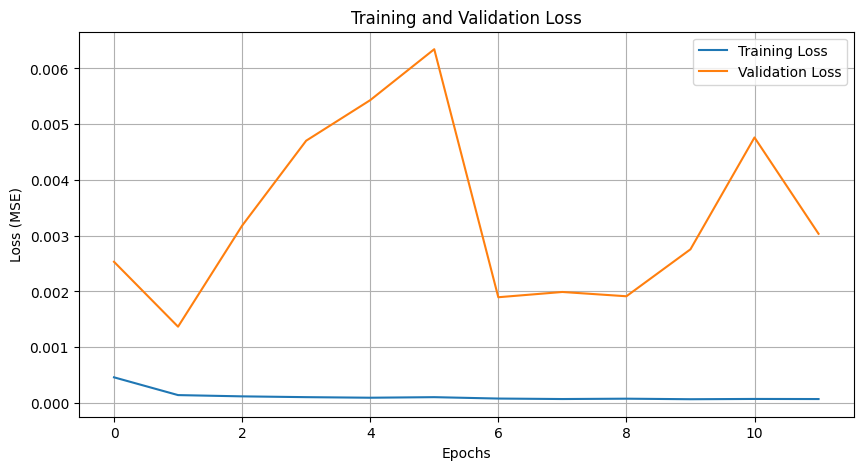

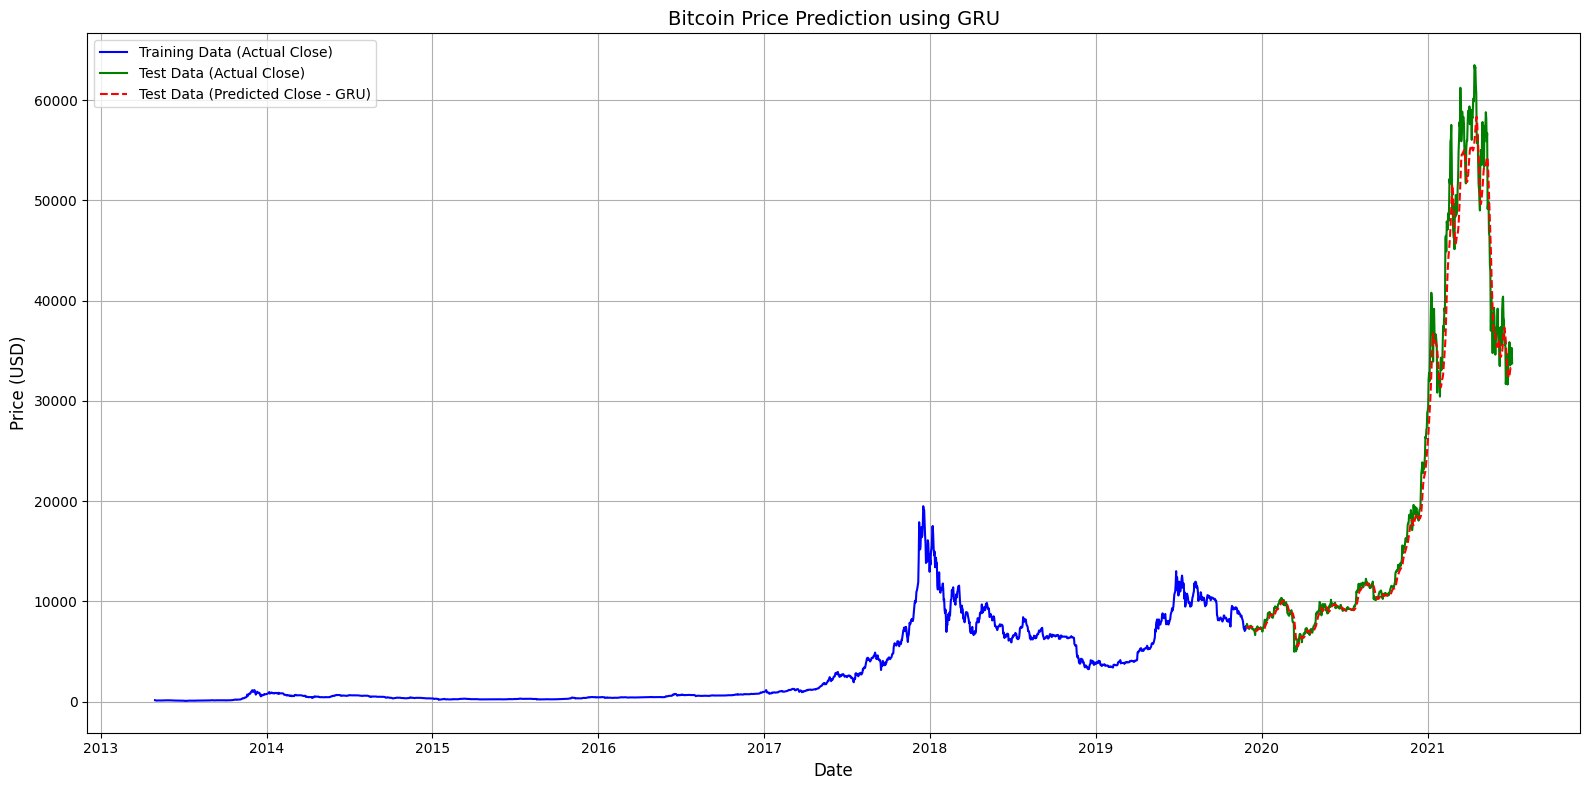

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Thêm r2_score
import math

# --- CÀI ĐẶT CHO HIỂN THỊ TIẾNG VIỆT TRÊN BIỂU ĐỒ (TÙY CHỌN) ---
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['axes.unicode_minus'] = False

# 1. Load the data
try:
    df = pd.read_csv('coin_Bitcoin.csv')
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file coin_Bitcoin.csv. Vui lòng đảm bảo file nằm trong cùng thư mục.")
    exit()

# 2. Preprocessing cơ bản
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Chỉ sử dụng cột 'Close' để dự báo
data = df[['Close']].copy()
print("Dữ liệu gốc (5 dòng đầu):")
print(data.head())
print(f"\nTổng số dòng dữ liệu: {len(data)}")

# 3. Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 4. Tạo chuỗi dữ liệu (Sequences)
time_step = 60

def create_sequences(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

X, y = create_sequences(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"\nHình dạng của X (dữ liệu đầu vào): {X.shape}")
print(f"Hình dạng của y (dữ liệu mục tiêu): {y.shape}")

# 5. Chia dữ liệu Train/Test
training_size = int(len(X) * 0.80)
test_size = len(X) - training_size

X_train, X_test = X[0:training_size], X[training_size:len(X)]
y_train, y_test = y[0:training_size], y[training_size:len(y)]

print(f"\nSố lượng mẫu training: {len(X_train)}")
print(f"Số lượng mẫu testing: {len(X_test)}")

# 6. Xây dựng Mô hình GRU
model = Sequential()
model.add(GRU(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(GRU(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# 7. Huấn luyện Mô hình
print("\n--- Bắt đầu huấn luyện mô hình GRU ---")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)
print("--- Huấn luyện hoàn tất ---")

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('gru_training_loss.png')
print("\nĐã lưu biểu đồ training loss: gru_training_loss.png")
# plt.show()

# 8. Đánh giá Mô hình
train_predict_scaled = model.predict(X_train)
test_predict_scaled = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict_scaled)
test_predict = scaler.inverse_transform(test_predict_scaled)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0 # Tránh chia cho 0
    if not np.any(mask): # Nếu tất cả y_true là 0
        return np.nan if np.any(y_pred != 0) else 0 # Hoặc xử lý khác
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Tính toán RMSE, MAE, R2, MAPE
train_rmse = math.sqrt(mean_squared_error(y_train_orig, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_orig, test_predict))
train_mae = mean_absolute_error(y_train_orig, train_predict)
test_mae = mean_absolute_error(y_test_orig, test_predict)
train_r2 = r2_score(y_train_orig, train_predict)
test_r2 = r2_score(y_test_orig, test_predict)
train_mape = mean_absolute_percentage_error(y_train_orig, train_predict)
test_mape = mean_absolute_percentage_error(y_test_orig, test_predict)

print(f"\n--- Đánh giá Mô hình ---")
print(f"Train RMSE: {train_rmse:.2f} USD")
print(f"Test RMSE:  {test_rmse:.2f} USD")
print(f"Train MAE:  {train_mae:.2f} USD")
print(f"Test MAE:   {test_mae:.2f} USD")
print(f"Train R2:   {train_r2:.4f}")
print(f"Test R2:    {test_r2:.4f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE:  {test_mape:.2f}%")


# 9. Trực quan hóa Kết quả Dự đoán (theo style yêu cầu)

# Xác định điểm bắt đầu của dữ liệu test trong DataFrame gốc `data`
# y_test_orig là các giá trị thực tế mà test_predict dự đoán.
# Chúng bắt đầu từ index `time_step + training_size` trong `scaled_data`
# (hoặc `data` nếu chúng ta map index trở lại)
idx_test_start_in_original_data = time_step + training_size

# Dữ liệu training thực tế để vẽ (màu xanh)
train_actual_dates = data.index[:idx_test_start_in_original_data]
train_actual_values = data['Close'].iloc[:idx_test_start_in_original_data]

# Dữ liệu test thực tế để vẽ (màu xanh lá)
# y_test_orig chứa các giá trị này, chúng ta cần ngày tương ứng
test_actual_dates = data.index[idx_test_start_in_original_data : idx_test_start_in_original_data + len(y_test_orig)]
# test_actual_values = y_test_orig.flatten() # Đây là giá trị thực tế của tập test

# Dữ liệu test dự đoán để vẽ (màu đỏ nét đứt)
# test_predict chứa các giá trị này, ngày tương ứng giống như test_actual_dates
test_predicted_values = test_predict.flatten()


plt.figure(figsize=(16, 8)) # Kích thước giống ảnh mẫu
plt.plot(train_actual_dates, train_actual_values, label='Training Data (Actual Close)', color='blue', linewidth=1.5)
plt.plot(test_actual_dates, y_test_orig.flatten(), label='Test Data (Actual Close)', color='green', linewidth=1.5) # Sử dụng y_test_orig
plt.plot(test_actual_dates, test_predicted_values, label='Test Data (Predicted Close - GRU)', color='red', linestyle='--', linewidth=1.5)

plt.title('Bitcoin Price Prediction using GRU', fontsize=14) # Tiêu đề tương tự
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(loc='upper left') # Vị trí legend giống ảnh mẫu
plt.grid(True)
plt.tight_layout()
plt.savefig('bitcoin_gru_prediction_styled.png')
print("\nĐã lưu biểu đồ dự đoán theo style mới: bitcoin_gru_prediction_styled.png")
# plt.show()

# (Biểu đồ chi tiết dự đoán test có thể không cần thiết nữa nếu biểu đồ trên đã đủ rõ)
# plt.figure(figsize=(15, 7))
# plt.plot(y_test_orig.flatten(), label='Giá Thực Tế (Test Set)', color='blue')
# plt.plot(test_predicted_values, label='Dự Đoán GRU (Test Set)', color='red', linestyle='--')
# plt.title('Chi Tiết Dự Đoán Giá Bitcoin trên Tập Test', fontsize=16)
# plt.xlabel('Bước Thời Gian (trong tập test)', fontsize=12)
# plt.ylabel('Giá (USD)', fontsize=12)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('bitcoin_gru_prediction_test_detail.png')
# print("Đã lưu biểu đồ chi tiết dự đoán test: bitcoin_gru_prediction_test_detail.png")
# plt.show()

print("\n--- Hoàn thành ---")